In [1]:
import numpy as np
import pandas as pd

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
!pip install openpyxl
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2
                      )

print ('Data dowloaded and read into a dataframe!')

Data dowloaded and read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#imprimir el tamaño del DataFrame
print(df_can.shape)

(195, 43)


In [6]:
#Depurar el conjunto de datos para borrar columnas innecesarias
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

#Cambiar el nombre de algunas columnas para que tengan sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

#Para tener consistencia, nos aseguramos que todas las columnas sean de tipo cadena (str)
df_can.columns= list(map(str, df_can.columns))

#Establecer el nombre del pais (Country) como indice - Util para hacer busquedas por paises con el metodo .loc
df_can.set_index('Country', inplace=True)

#Agregamos una columna para el Total
df_can['Total']= df_can.sum(axis=1)

#Años que vamos a utilizar del DataFrame - de utilidad para graficar mas adelante
years= list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\Cex\AppData\Local\Temp\ipykernel_13164\35384626.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']= df_can.sum(axis=1)


In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #estilo de grafico con la libreria ggplot

#Revisar la ultima version de Matplotlib
print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.5.1


In [8]:
#Agrupamos los paises por continente y aplicamos la funcion sum()
df_continents= df_can.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


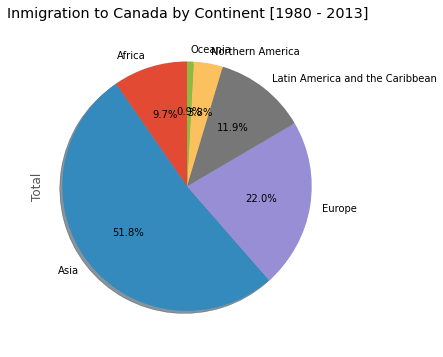

In [9]:
#Graficaremos los datos utilizando un grafico de "Torta" ("PIE")

#autopct crea %, el angulo de inicio representa el punto de inicio
df_continents['Total'].plot(kind='pie',
                           figsize=(5,6), #tamaño de la figura
                            autopct='%1.1f%%', #añade en porcentajes
                            startangle= 90, #angulo de inicio
                            shadow=True, #añade sombreado
                           )
plt.title("Inmigration to Canada by Continent [1980 - 2013]")
plt.axis('equal') #el pastel tiene aspecto circular

plt.show()
                            

La visualizacion de arriba no esta clara. Hagamos algunas modificaciones para mejorarla.
* Quitar las etiquetas de texto en la grafica pasandole 'legend' y añadiendolo separadamente utilizando 'plt.legend()'.
* Retiramos los porcentajes y los ponemos fuera de la grafica, pasando el parametro 'pctdistance'.
* Ponemos los colores que nosotros queremos al grafico con el parametro 'colors'.
* **Explotamos** la grafica para resaltar a los ultimos 3 continentes pasando el parametro 'explode'.

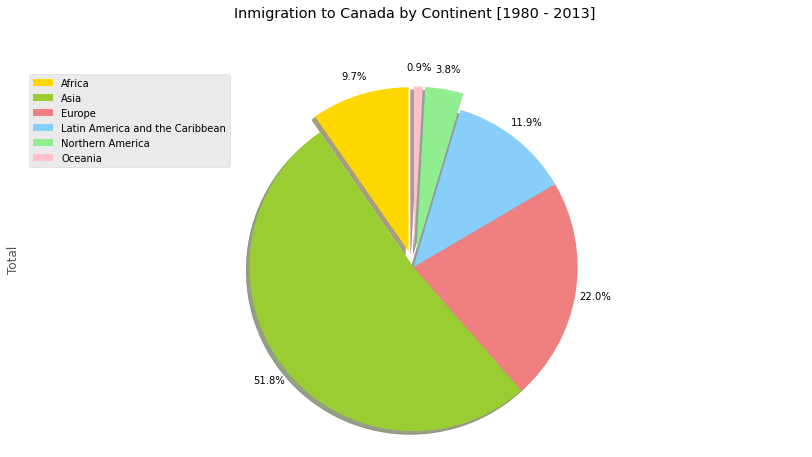

In [10]:
colors_list= ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list= [0.1, 0, 0, 0, 0.1, 0.1] #la relacion para cada continente para compensar cada parte del pastel (cuanto lo resaltamos)

df_continents['Total'].plot(kind='pie',
                           figsize=(14,7),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None, #deshabilita las etiquetas de la grafica
                           pctdistance=1.12, #la relacion entre el centro de cada trozo del pastel y el inicio del texto generado por autopct
                           colors=colors_list, #añadir colores personalizados
                           explode= explode_list #'explota' los ultimos 3 continentes
                           )

#escala el titulo un 12% para igualar pctdistance
plt.title('Inmigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')

#añadimos etiqueta
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

**GRAFICAS DE CAJA**

* Grafica para los inmigrantes japoneses entre 1980 y 2013

In [11]:
# A pesar de tener que extraer datos para un solo pais, lo haremos como un dataframe. Esto nos ayudara a llamar el metodo 'dataframe.describe()' para ver los percentiles.
# Para obtener el dataframe se colocan corchetes alrededor de Japan

df_japan= df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


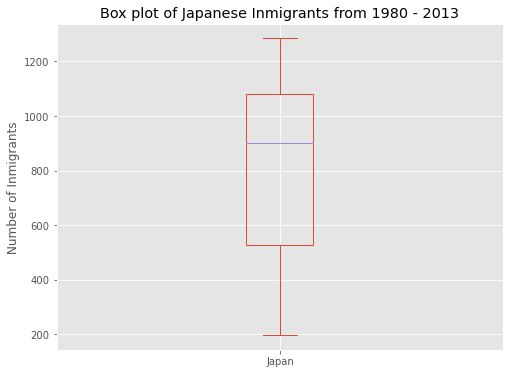

In [12]:
# Dibujamos la grafica con kind=box

df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Inmigrants from 1980 - 2013')
plt.ylabel('Number of Inmigrants')

plt.show()

Algunas observaciones de la grafica anterior:

1. El numero minimo de inmigrantes es de alrededor de 200 (min), el maximo de 1300(max) y una media de 900(median).
2. 25% de los años para el periodo tiene una cuenta anual de inmigrantes de 500 o menos (primer cuartil).
3. 75% de los años para el periodo tienen una cuenta anual de inmigrantes de 1100 o menos (tercel cuartil).

**Uno de los mejores beneficios de las graficas de caja es poder comparar la distribucion de dos o mas conjuntos de datos.**

In [13]:
#Compararemos la distribucion del numero de nuevos inmigrantes de India y China para el periodo 1980 - 2013.

df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [14]:
#Veamos los porcentajes en ambos paises usando el metodo 'describe()'
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


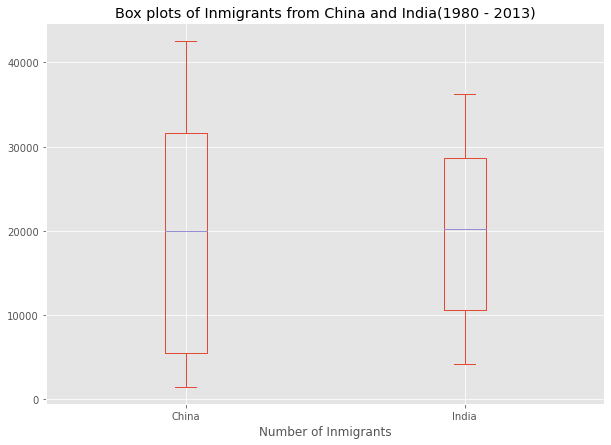

In [15]:
# Ahora graficamos
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Inmigrants from China and India(1980 - 2013)')
plt.xlabel('Number of Inmigrants')

plt.show()

Podemos observar que mientras ambos paises tienen una mediana parecida (20.000), la de China tiene un rango mas amplio que India. La poblacion maxima para India para cualquier año (36.210) es alrededor de 15% menos que la maxima de China (42.584).

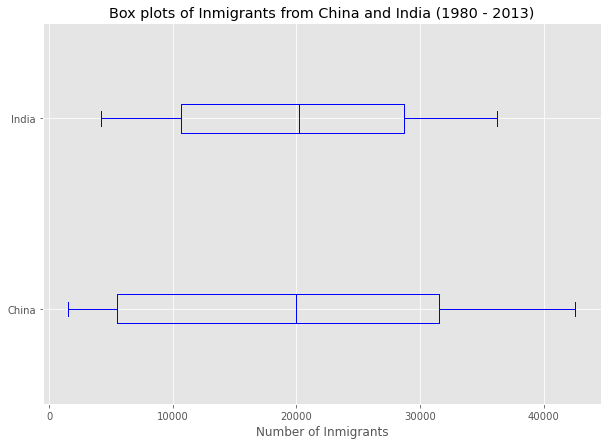

In [16]:
#A continuacion haremos las graficas de forma Horizontal y le asignaremos un color (el rojo viene por defecto)
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Inmigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Inmigrants')

plt.show()

**SUB GRAFICAS**

Sirve para visualizar juntas multiples graficas, creando un 'figure' y dividiendolo en 'subplots'

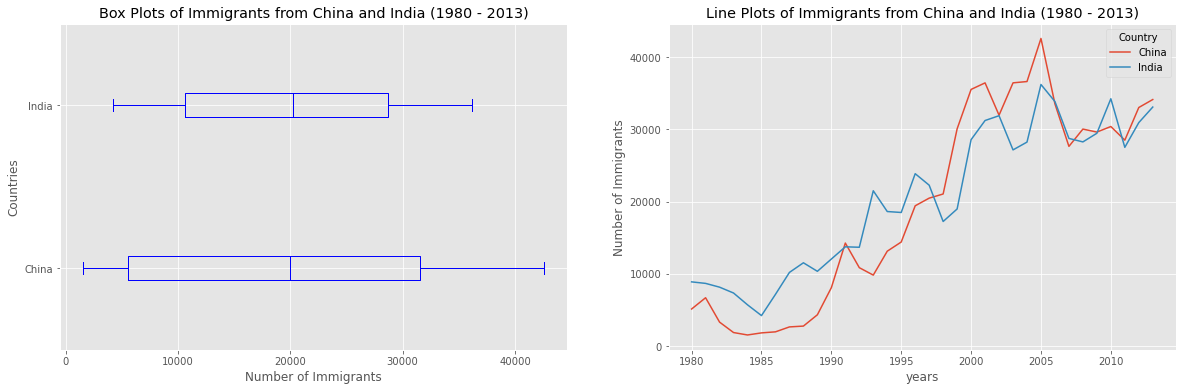

In [17]:
fig= plt.figure() #crear imagen

ax0= fig.add_subplot(1,2,1) #añadir sub grafica 1 (1 fila, 2 columnas, primer grafica)
ax1= fig.add_subplot(1,2,2) #añadir sub grafica 2 (1 fila, 2 columnas, segunda grafica)

#sub grafica 1: Grafica de caja
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) #añadir sub grafica 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

#Sub grafica 2: Grafica de linea
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) #añadir sub grafica 2
ax1.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_xlabel('years')
ax1.set_ylabel('Number of Immigrants')

plt.show()

1. Crearemos una grafica de caja para visualizar la distribucion de los 15 paises principales (en base al total de inmigracion) agrupados por las decadas `1980`, `1990` y `2000`.

In [18]:
# Obtenemos el conjunto de datos que queremos
df_top15= df_can.sort_values(['Total'], ascending=False, axis=0).head()
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


2. Creamos un nuevo dataframe el cual contenga el agregado de cada decada.

In [19]:
# Creamos una lista de todos los años separados por las decadas 80, 90 y 2000
years_80s = list(map(str, range(1980, 1990)))
years_90s = list (map(str, range(1990, 2000)))
years_00s = list (map(str, range(2000, 2010)))

# Dividimos el dataframe original df_can para crear una serie para cada decada y hacer la suma de todos los años para cada pais
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

#Juntamos las 3 series en un nuevo dataframe. Lo llamamos `new_df`
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [20]:
# Aprendamos mas sobre las estadisticas asociadas al dataframe usando el metodo describe()
new_df.describe()

,1980s,1990s,2000s
count,5.000000,5.000000,5.000000
mean,72936.600000,161534.600000,205578.200000
std,65347.941523,71123.688929,111638.068461
min,10591.000000,65302.000000,83413.000000
25%,32003.000000,138482.000000,127598.000000
50%,60764.000000,161528.000000,172904.000000
75%,82154.000000,180395.000000,303591.000000
max,179171.000000,261966.000000,340385.000000


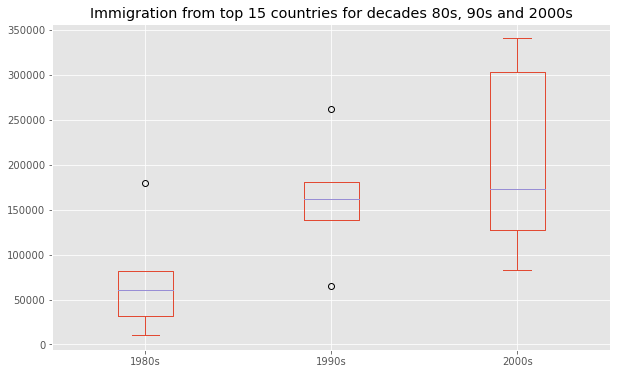

In [21]:
# Hacemos las graficas de caja
new_df.plot(kind = 'box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

La grafica de arriba escanea los datos e identifica los que estan separados (outliers). Para reconocer estos datos su valor debe ser:
- Mayor a Q3 por al menos 1.5 veces el rango intercuartil (IQR) o mas pequeño que Q1 por al menos 1.5 veces IQR.

Revisemos la decada del 2000 como ejemplo:
- Q1 (25%)= 36,101.5
- Q3 (75%)= 105,505.5
- IQR= Q3 - Q1= 69,404

Entonces cualquier valor mayor a Q3 por 1.5 vece IQR sera un valor atipico en nuetra grafica.
- Outlier > 105,505.5 + (1.5 * 69,404)
- Outlier > 209,611.5

In [22]:
# Comprobemos cuantas entradas caen en la definicion de dato separado
new_df[new_df['2000s']>209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


# Grafica de Dispersion
Una grafica de dispersion (2D) es un metodo util para comparar variables entre si. Los datos en estas graficas muestran tendencias. Con analisis mas profundos usando herramientas como la regresion, podemos calcular matematicamente esta relacion y usarla para describir tendencias fuera del conjunto de datos.

Visualicemos la tendencia del total de inmigracion hacia Canada (todos los paises) para los años 1980 - 2013.

In [23]:
# Obtenemos el conjunto de datos. Debido a que esperamos usar la relacion entre años y poblacion total, convertimos años a tipo 'int'
!pip install openpyxl
import pandas as pd


# Podemos usar el metodo sum() para obtener la poblacion total anual
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Cambiar los años a tipo entero (sera util para hacer regresion mas adelante)
df_tot.index = map(int, df_tot.index)

# Establecer de nuevo el indice para regresarlas a columnas en el dataframe df_tot
df_tot.reset_index(inplace = True)

# Renombrar las columnas
df_tot.columns = ['year', 'total']

# Ver el dataframe final
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


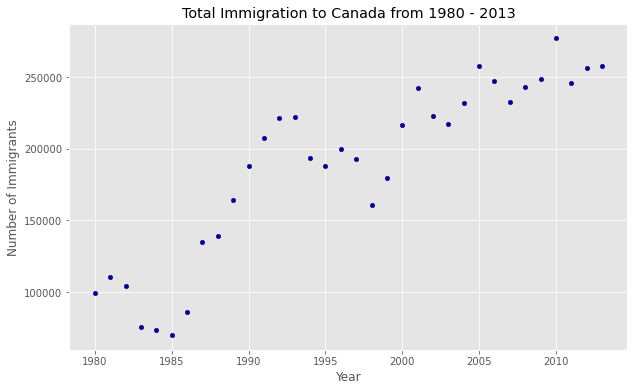

In [24]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Observamos como la grafica no conecta los datos entre si. Tambien, que hay una tendencia positiva en los datos: a medida que pasan los años, el numero total de inmigrantes asciende.Podemos analizar matematicamente esta tendencia positiva usando una linea de regresion.

Graficaremos una linea de regresion y la utilizaremos para predecir el numero de inmigrantes en 2015.

In [25]:
#Obtenemos la ecuacion de la linea. Usamos el metodo 'polyfit()' de NumPy pasando lo siguiente:
x= df_tot['year'] #año en el eje X
y= df_tot['total'] #total en el eje Y
fit= np.polyfit(x, y, deg=1) #La salida es un array con los coeficientes polinomiales
fit

array([ 5.56709228e+03, -1.09261952e+07])

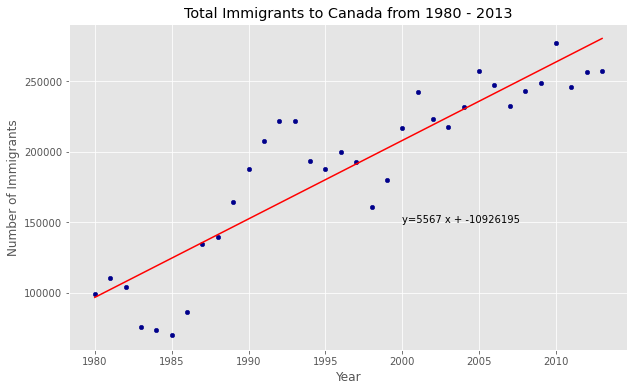

'No. Immigrants=5567 * Year + -10926195'

In [26]:
#Graficamos la regresion lineal en una grafica de dispersion
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')
plt.title('Total Immigrants to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

#Dibujamos la linea de regresion
plt.plot(x, fit[0] * x + fit[1], color='red') #Recordemos que X son los años
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

#Imprimir la linea optima
'No. Immigrants={0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

Usando la ecuacion de la linea optima podemos estimar el numero de inmigrantes para 2015:
No. Inmigrantes= 5567* AÑO-10926195
No. Inmigrantes= 5567* 2015-10926195
No. Inmigrantes= 291,310

Cuando lo comparamos con los numeros actuales del Reporte Anual 2016 de Ciudadania e Inmigracion de Canada, podemos observar que Canada ha aceptado 271,845 inmigrantes en 2015. Nuestro valor estimado de 291,310 esta dentro del 7% del numero actual, lo cual es muy bueno si se considera que nuestros datos originales vienen de Naciones Unidas y podrian ser distintos a nuestros datos.

  **Graficas de Burbuja** 

Es una variante de la grafica de dispersion que muestra los datos en tres dimensiones (x, y, z). Los datos son reemplazados por burbujas y el tamaño de cada una es determinado por la variable Z, conocida tambien como el peso. En Matplotlib podemos pasar un array o escalar mediante 's' a la funcion "plot()" que contiene el peso de cada punto.

EMPECEMOS ANALIZANDO EL EFECTO DE LA GRAN DEPRESION EN ARGENTINA

Argentina padecio una severa depresion entre 1998 y 2002 que causo un desempleo generalizado, la caida del gobierno y la suspension de pagos de su deuda externa. En terminos de ingresos, mas del 50% de los Argentinos empobrecieron y 7 de cada 10 niños eran pobres en 2002.

Analicemos el efecto de la crisis y vamos a comparar la inmigracion de Argentinos hacia su pais vecino Brasil. Vamos a usar una grafica de burbuja para los años 1980 a 2013. 
Estableceremos los pesos para las burbujas como el valor normalizado para cada año.

Obtenemos los datos de Brasil y Argentina. Pasamos los datos YEARS a tipo (int).

In [27]:
df_can_t= df_can[years].transpose() #transponemos dataframe

df_can_t.index= map(int, df_can_t.index) #cambia el tipo de Years a entero (int)

df_can_t.index.name='Year' #etiquetamos el indice. Automaticamente sera el nombre de la columna cuando se haga reset al indice

df_can_t.reset_index(inplace=True) #reset al indice para colocar Year como columna

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Usaremos el escalado de variables para colocar todos los valores en el rango [0,1]. La formula es X'= X - Xmin/ Xmax - Xmin. La formula establece el valor maximo en el conjunto de datos a 1, y el minimo a 0. El resto de datos se escalan acordemente a valores entre 0-1.

In [28]:
norm_brazil= (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min()) #normalizar los datos de Brasil

norm_argentina= (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min()) #normalizar los datos de Argentina



Paso 3: Graficar los datos


. Para graficar los distintas graficas de dispersion, podemos incluir los ejes de una dentro de otra mediante el parametro 'ax'.

. Pasaremos ademas los pesos con el parametro 's'. Dado que los pesos normalizados se encuentran entre 0 y 1, estos no seran visibles en la grafica. Por lo tanto: -Multiplicaremos los pesos por 2000 para escalarlos en la grafica Y.
-Sumaremos 10 para compensar el valor minimo (que tiene un peso de 0)

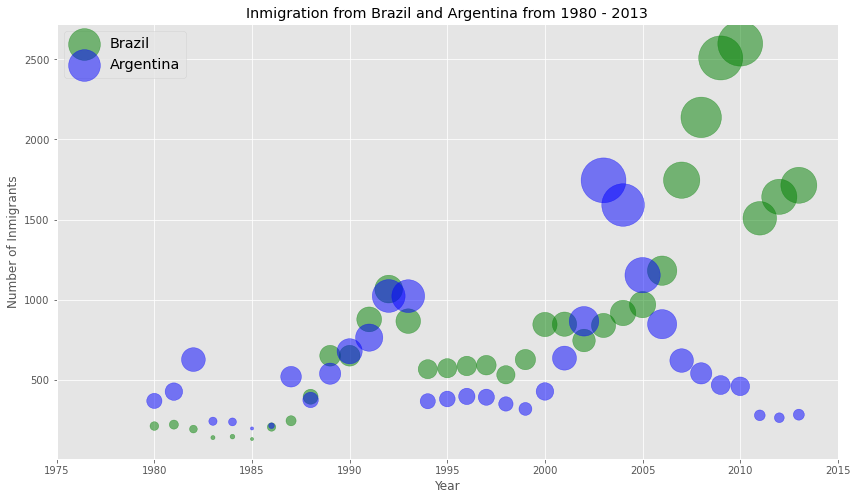

In [30]:
#Brazil
ax0 = df_can_t.plot(kind='scatter',
x='Year',
y='Brazil',
figsize=(14, 8),
alpha=0.5,  #transparencia
color="green",
s=norm_brazil * 2000 + 10,  #pasar los pesos
xlim=(1975, 2015)
)

#Argentina
ax1 = df_can_t.plot(kind='scatter',
x='Year',
y='Argentina',
alpha=0.5,
color="blue",
s=norm_argentina * 2000 + 10,
ax= ax0
)

ax0.set_ylabel('Number of Inmigrants')
ax0.set_title('Inmigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc= 'upper left', fontsize='x-large')

In [31]:
norm_china= (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

norm_india= (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

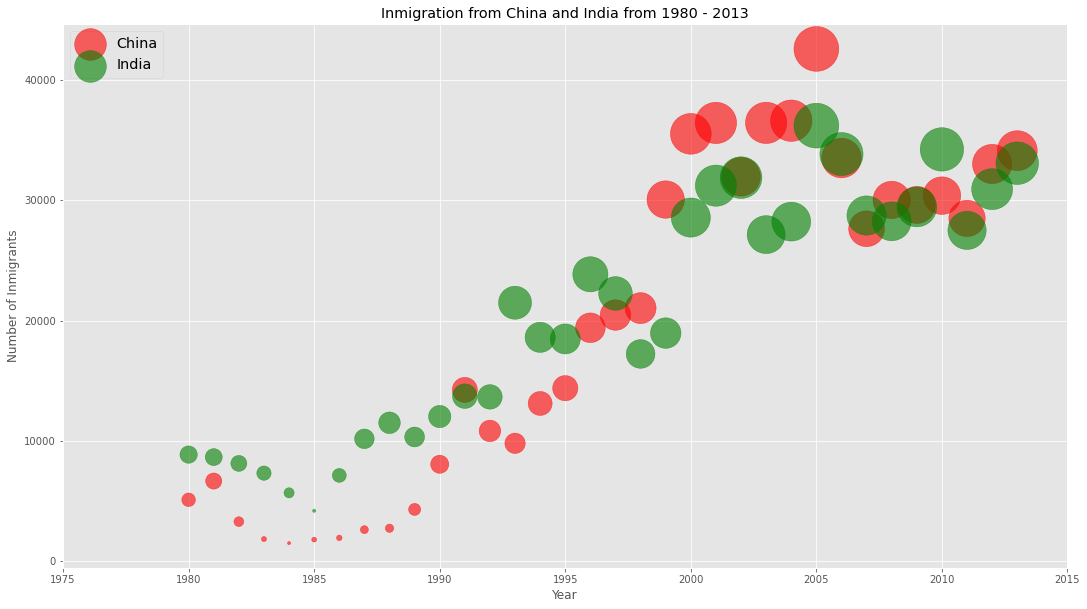

In [36]:
#China
ax0 = df_can_t.plot(kind='scatter',
x='Year',
y='China',
figsize=(18, 10),
alpha=0.6,
color='Red',
s=norm_china * 2000 + 10,
xlim= (1975, 2015)
)

#India
ax1 = df_can_t.plot(kind='scatter',
x='Year',
y='India',
alpha=0.6,
color='green',
s=norm_india * 2000 + 10,
ax = ax0
)

ax0.set_ylabel('Number of Inmigrants')
ax0.set_title('Inmigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')